# **Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)**

**Amy Murakami Tsutsumi - A01750185**

Para este portafolio se analizarán los datos del clima en Szeged, Hungría del año 2006-2016. Este dataset se obtuvo de la siguiente liga: https://www.kaggle.com/datasets/budincsevity/szeged-weather

Únicamente se utilizarán los primeros 100 datos de las columnas de temperatura y humedad. De esta manera se podrá predecir si existe una relación entre estos valores y si se puede predecir la humedad al tener el dato de la temperatura. 

In [34]:
import pandas as pd

df = pd.read_csv('weatherHist.csv') #Leer el dataset
df.head()

,Temperature (C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


In [35]:
temp = df['Temperature (C)'] #Variable de temperatura 
humidity = df['Humidity'] #Variable de humedad
temp.head()

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature (C), dtype: float64

Para realizar las predicciones se utilizará el modelo de regresión lineal. Por lo tanto, se utilizarán las siguientes fórmulas: 

$θ_0 = θ_0 - α \frac{1}{n} 
\sum_{i=1}^{n}(h_{0}(x_{i})+y_{i}) 
 $

$θ_1 = θ_1 - α \frac{1}{n} 
\sum_{i=1}^{n}(h_{0}(x_{i})+y_{i})x_i 
 $

In [36]:
def h(temp,theta):
  # Calcular la función de hipótesis
  return theta[0] + theta[1]*temp

theta = [1,1] # Valores de theta_i del modelo [theta_0, theta_1]
alpha = 0.0005 # Tasa de aprendizaje 
n =len(temp) # Número de datos
iter = 100000 # Número de iteraciones

print("Theta inicial: ", theta)

for idx in range(iter):
  # Listas para almacenar los valores de h, theta 0 y theta 1
  allh = []
  delta = []
  deltaX =[]

  for x_i,y_i in zip(temp,humidity):
    # Almacenar valores calculados de h, theta 0 y theta 1 de cada iteración
    allh.append(h(x_i,theta))
    delta.append(h(x_i,theta)-y_i)
    deltaX.append((h(x_i,theta)-y_i)*x_i)

  # Cálculo final del theta 0 y theta 1
  theta[0] = theta[0] - alpha/n*sum(delta) #Cálculo de theta 0
  theta[1] = theta[1] - alpha/n*sum(deltaX) #Cálculo de theta 1

print("Theta final: ", theta)

Theta inicial:  [1, 1]
Theta final:  [1.1076850637197209, -0.03113631344694693]


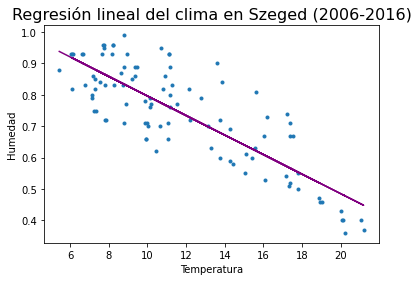

In [37]:
# Graficar 
import matplotlib.pyplot as plt
plt.title("Regresión lineal del clima en Szeged (2006-2016)", fontsize=16)
plt.scatter(temp, humidity, marker='.')
plt.plot(temp, theta[0] + theta[1]*temp, color="purple")
plt.xlabel("Temperatura")
plt.ylabel("Humedad")
plt.show()